In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
data = pd.read_csv("employee_attrition_dataset_dirty.csv")
data.head()

,emp_id,age,gender,department,experience,salary,overtime,satisfaction_score,attrition
0,1,38,Female,IT,13,33338.0,Yes,9.0,Yes
1,2,32,Male,HR,3,96289.0,No,9.0,No
2,3,51,Male,IT,1,91520.0,Yes,8.0,No
3,4,56,Male,Finance,9,38895.0,Yes,5.0,Yes
4,5,59,Female,HR,31,67910.0,Yes,3.0,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   emp_id              1005 non-null   int64  
 1   age                 1005 non-null   int64  
 2   gender              1005 non-null   object 
 3   department          1005 non-null   object 
 4   experience          1005 non-null   int64  
 5   salary              979 non-null    float64
 6   overtime            1005 non-null   object 
 7   satisfaction_score  980 non-null    float64
 8   attrition           1005 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 70.8+ KB


In [4]:
data.isnull().sum()

emp_id                 0
age                    0
gender                 0
department             0
experience             0
salary                26
overtime               0
satisfaction_score    25
attrition              0
dtype: int64

In [5]:
data.describe()

,emp_id,age,experience,salary,satisfaction_score
count,1005.000000,1005.000000,1005.000000,9.790000e+02,980.000000
mean,501.068657,40.248756,17.128358,7.619542e+04,5.418367
std,288.355045,11.012208,9.530850,7.427524e+04,2.876141
min,1.000000,22.000000,1.000000,2.000500e+04,1.000000
25%,252.000000,31.000000,9.000000,4.257100e+04,3.000000
50%,502.000000,40.000000,17.000000,7.132200e+04,5.000000
75%,749.000000,50.000000,25.000000,9.750900e+04,8.000000
max,1000.000000,59.000000,34.000000,1.094490e+06,10.000000


In [19]:
data["salary"].fillna(data["salary"].mean(),inplace =True)

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_7368\4286829471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["salary"].fillna(data["salary"].mean(),inplace =True)


In [20]:
data["satisfaction_score"].fillna(data["satisfaction_score"].mean(),inplace=True )

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_7368\3364232519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["satisfaction_score"].fillna(data["satisfaction_score"].mean(),inplace=True )


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["department"] = le.fit_transform(data["department"])
data["gender"] = le.fit_transform(data["gender"])

data["overtime"] = le.fit_transform(data["overtime"])

data["attrition"] = le.fit_transform(data["attrition"])


In [22]:
data.describe()

,emp_id,age,gender,department,experience,salary,overtime,satisfaction_score,attrition
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03,1005.000000,1005.000000,1005.000000
mean,501.068657,40.248756,0.518408,1.457711,17.128358,7.619542e+04,0.497512,5.418367,0.342289
std,288.355045,11.012208,0.499910,1.140286,9.530850,7.330720e+04,0.500243,2.840106,0.474712
min,1.000000,22.000000,0.000000,0.000000,1.000000,2.000500e+04,0.000000,1.000000,0.000000
25%,252.000000,31.000000,0.000000,0.000000,9.000000,4.369600e+04,0.000000,3.000000,0.000000
50%,502.000000,40.000000,1.000000,1.000000,17.000000,7.277100e+04,0.000000,5.000000,0.000000
75%,749.000000,50.000000,1.000000,3.000000,25.000000,9.675900e+04,1.000000,8.000000,1.000000
max,1000.000000,59.000000,1.000000,3.000000,34.000000,1.094490e+06,1.000000,10.000000,1.000000


In [23]:
data.head()

,emp_id,age,gender,department,experience,salary,overtime,satisfaction_score,attrition
0,1,38,0,2,13,33338.0,1,9.0,1
1,2,32,1,1,3,96289.0,0,9.0,0
2,3,51,1,2,1,91520.0,1,8.0,0
3,4,56,1,0,9,38895.0,1,5.0,1
4,5,59,0,1,31,67910.0,1,3.0,1


In [24]:
data.head()

,emp_id,age,gender,department,experience,salary,overtime,satisfaction_score,attrition
0,1,38,0,2,13,33338.0,1,9.0,1
1,2,32,1,1,3,96289.0,0,9.0,0
2,3,51,1,2,1,91520.0,1,8.0,0
3,4,56,1,0,9,38895.0,1,5.0,1
4,5,59,0,1,31,67910.0,1,3.0,1


In [25]:
data.corr()

,emp_id,age,gender,department,experience,salary,overtime,satisfaction_score,attrition
emp_id,1.000000,-0.029092,0.048569,0.035670,0.053028,0.000722,0.020795,0.007928,-0.015867
age,-0.029092,1.000000,0.024135,0.042322,-0.013790,0.039763,0.021086,0.009892,0.021421
gender,0.048569,0.024135,1.000000,-0.081192,0.005461,0.036808,-0.024710,-0.060474,-0.055957
department,0.035670,0.042322,-0.081192,1.000000,0.008794,0.034307,-0.017209,-0.001720,0.013887
experience,0.053028,-0.013790,0.005461,0.008794,1.000000,-0.015182,-0.037223,0.003907,0.043994
salary,0.000722,0.039763,0.036808,0.034307,-0.015182,1.000000,-0.070453,0.014108,-0.228461
overtime,0.020795,0.021086,-0.024710,-0.017209,-0.037223,-0.070453,1.000000,-0.021261,0.242662
satisfaction_score,0.007928,0.009892,-0.060474,-0.001720,0.003907,0.014108,-0.021261,1.000000,-0.293829
attrition,-0.015867,0.021421,-0.055957,0.013887,0.043994,-0.228461,0.242662,-0.293829,1.000000


<Axes: >

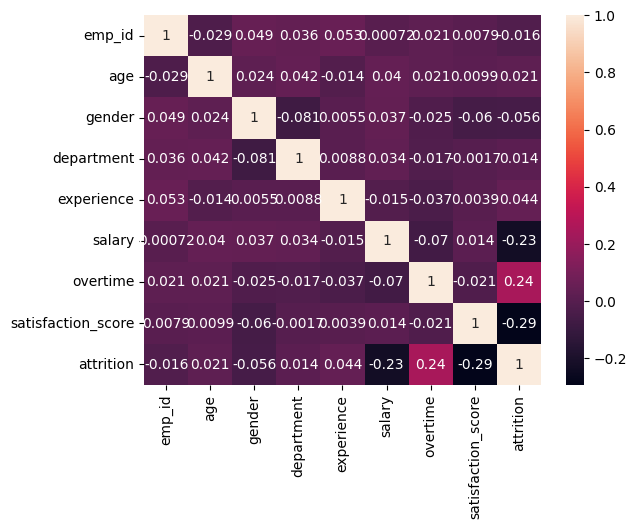

In [26]:
sns.heatmap(data.corr(),annot = True)

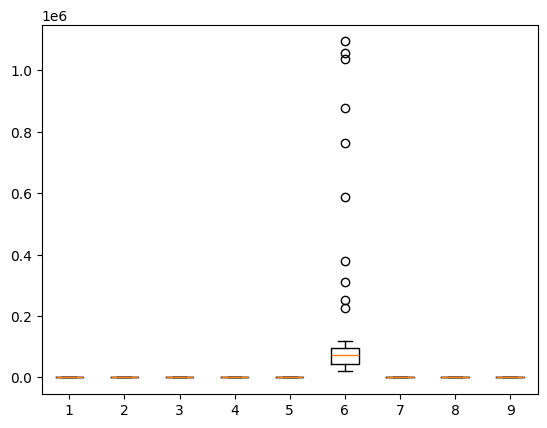

In [27]:
plt.boxplot(data)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X = data[["overtime","experience","department","age","salary"]]
y = data["attrition"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 , random_state =42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.2f}")


C:\Users\TEJAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.78
Decision Tree Classifier: Accuracy = 0.80
Random Forest Classifier: Accuracy = 0.82


In [34]:
print("classification_report:",classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.79      0.98      0.88       124
           1       0.96      0.58      0.73        77

    accuracy                           0.83       201
   macro avg       0.87      0.78      0.80       201
weighted avg       0.86      0.83      0.82       201



In [38]:
print("confusion_matrix:",confusion_matrix(y_test,y_pred))

confusion_matrix: [[119   5]
 [ 31  46]]
